<h2><b>Assignment Python 2

Nama : Tsaabitah Anggraini

Kode Peserta : PYTN-KS12-023

<h3><b>Project Overview

NYC Property Sales Dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

<br>

<h3><b> Import Library

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from IPython.display import Math, Latex
from IPython.core.display import Image

<br>

<h3><b>Data Loading

In [3]:
df = pd.read_csv('Dataset/nyc-rolling-sales.csv')
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


Karena pada kolom 'borough' value masi berupa angka maka kita akan menggantinya dengan daerah yang sesuai

In [4]:
df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
# Melihat dimensi data
df.shape

(84548, 22)

Diketahui dataset ini memiliki 84548 baris dan 22 kolom

In [6]:
df.describe()

,Unnamed: 0,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [8]:
# Menghapus kolom 'Unnamed: 0'
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
# Menampilkan kembali 5 data teratas
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  object
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [12]:
# Mengubah tipe data beberapa kolom
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [13]:
# Mencari kolom yang bertipe data selain object
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

In [14]:
# Mencari kolom yang bertipe data object
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'BUILDING CLASS AT TIME OF SALE']

In [16]:
# Mengecek kembali tipe data yang telah diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

<br>

<h3><b> Data Cleaning

Dilalukan pengecekan dataset apakah terdapat missing value dan duplikasi data

In [17]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
dtype: float64

In [18]:
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

In [19]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [20]:
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)

In [21]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [22]:
df = df.dropna()
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [23]:
df.duplicated().sum()

380

Karena terdapat 380 data yang duplikat, maka data duplikat tersebut akan dihapus dari dataset

In [24]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Mengecek apakah terdapat outlier pada kolom 'SALE PRICE' dengan cara membandingkan nilai rata-rata dengan nilai maksimum pada kolom tersebut

In [25]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,6.893400e+04,6.893400e+04,68934.000000,6.893400e+04
mean,4207.065425,365.869905,10799.695636,1.893376,0.165724,2.079424,3.682868e+03,3.707119e+03,1817.367467,1.270954e+06
std,3434.933083,652.366450,987.208476,14.359786,9.041035,17.074241,3.331437e+04,2.434511e+04,491.226548,1.144376e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1356.250000,21.000000,10307.000000,0.000000,0.000000,1.000000,1.900000e+03,1.280000e+03,1920.000000,2.290000e+05
50%,3390.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.950000e+03,2.400000e+03,1939.000000,5.300000e+05
75%,6191.750000,453.000000,11249.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


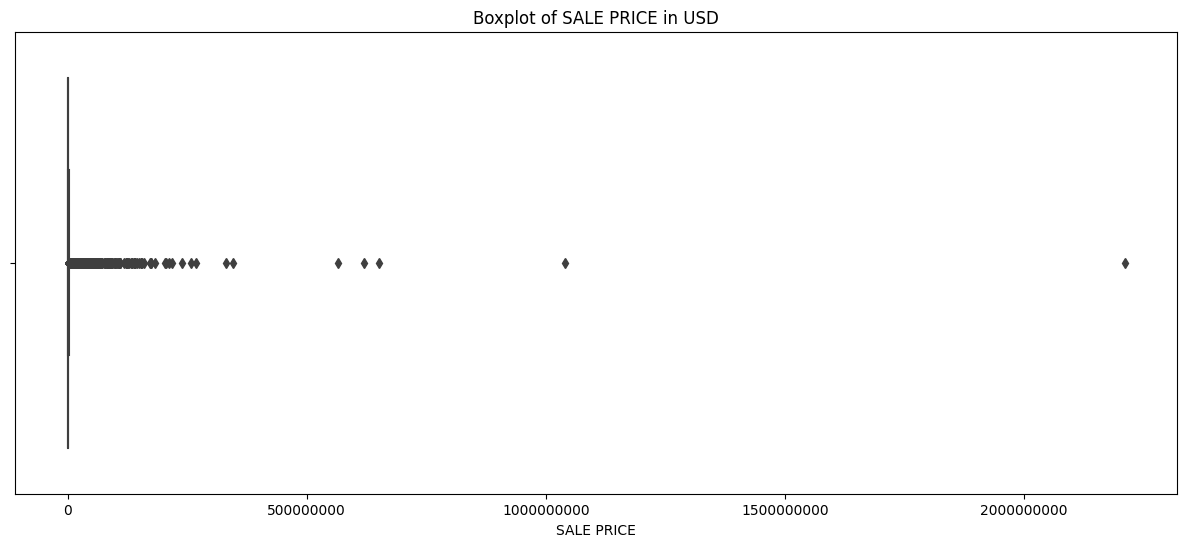

In [26]:
plt.figure(figsize=(15,6))


sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [28]:
# Mengambil data SALE PRICE dalam rentang 100000 - 5000000
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

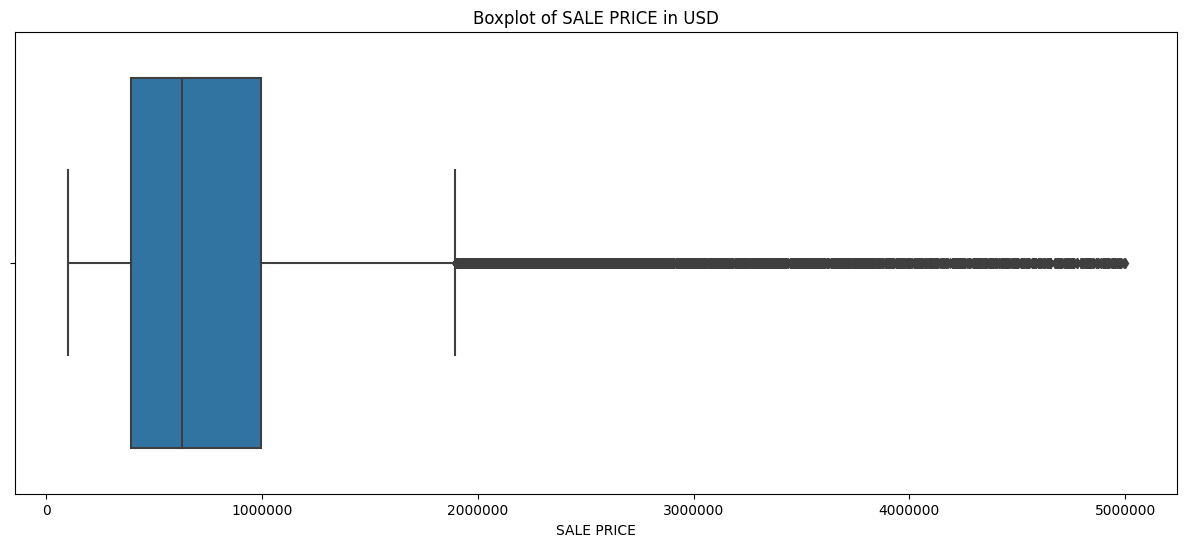

In [29]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [30]:
# Mengambil jumlah Total Units dalam rentang 0-50
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] < 50)]

In [31]:
# Menghapus data yang jika Commercial Units dan Residential Units dijumlahkan tidak sama dengan Total Units
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [32]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)] 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38586 entries, 3 to 84545
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         38586 non-null  object        
 1   NEIGHBORHOOD                    38586 non-null  object        
 2   BUILDING CLASS CATEGORY         38586 non-null  object        
 3   TAX CLASS AT PRESENT            38586 non-null  category      
 4   BLOCK                           38586 non-null  int64         
 5   LOT                             38586 non-null  int64         
 6   BUILDING CLASS AT PRESENT       38586 non-null  object        
 7   ADDRESS                         38586 non-null  object        
 8   ZIP CODE                        38586 non-null  int64         
 9   RESIDENTIAL UNITS               38586 non-null  int64         
 10  COMMERCIAL UNITS                38586 non-null  int64         
 11  TO

In [34]:
df.shape

(38586, 19)

Setelah dilakukan data cleaning, terdapat pengurangan jumlah baris dari 84548 baris menjadi 38586 baris dan jumlah kolom dari 22 kolom menjadi 19 kolom. Data yang telah dibersihkan ini dapat digunakan dibandingkan dengan data sebelumnya yang kemungkinan masih terdapat data null, missing value, data duplikat, dan lainnya yang jika tidak dilakukan pembersihan terlebih dahulu akan berpengaruh terhadap tingkat keakuratan data.

<br>

<h3><b>Measure of Central Tendency

<h4><b>Mean

In [35]:
mean_saleprice = statistics.mean(df['SALE PRICE'])
mean_lsf = statistics.mean(df['LAND SQUARE FEET'])
mean_gsf = statistics.mean(df['GROSS SQUARE FEET'])
print("Mean of Sale Price : ",mean_saleprice)
print("Mean of Land Square Feet : ",mean_lsf)
print("Mean of Gross Square Feet : ",mean_gsf)

Mean of Sale Price :  931190.1294770124
Mean of Land Square Feet :  3036.670489845669
Mean of Gross Square Feet :  2429.4216704954233


<h4><b>Median

In [36]:
median_saleprice = statistics.median(df['SALE PRICE'])
median_lsf = statistics.median(df['LAND SQUARE FEET'])
median_gsf = statistics.median(df['GROSS SQUARE FEET'])
print("Median of Sale Price : ",median_saleprice)
print("Median of Land Square Feet : ",median_lsf)
print("Median of Gross Square Feet : ",median_gsf)

Median of Sale Price :  687174.0
Median of Land Square Feet :  2622.0
Median of Gross Square Feet :  1988.0


<h4><b>Mode

In [37]:
mode_borough            = statistics.mode(df['BOROUGH'])
mode_Neighborhood       = statistics.mode(df['NEIGHBORHOOD'])
mode_TaxClassAtPresent = statistics.mode(df['TAX CLASS AT PRESENT'])
mode_BuildClassCategory       = statistics.mode(df['BUILDING CLASS CATEGORY'])
print("Mode Borough                         :" , mode_borough)
print("Mode Neighborhood                    :" , mode_Neighborhood)
print("Mode Tax Class at Present            :" , mode_TaxClassAtPresent )
print("Mode Building Class Category         :" , mode_BuildClassCategory )

Mode Borough                         : Queens
Mode Neighborhood                    : FLUSHING-NORTH
Mode Tax Class at Present            : 1
Mode Building Class Category         : 01 ONE FAMILY DWELLINGS                    


<br>

<h3><b> Measure of Spread

<h4><b>Range

In [38]:
range_saleprice = np.ptp(df['SALE PRICE'])
range_lsf = np.ptp(df['LAND SQUARE FEET'])
range_gsf = np.ptp(df['GROSS SQUARE FEET'])
print("Range of Sale Price : ",range_saleprice)
print("Range of Land Square Feet : ",range_lsf)
print("Range of Gross Square Feet : ",range_gsf)

Range of Sale Price :  4896141.0
Range of Land Square Feet :  970000.0
Range of Gross Square Feet :  566858.0


<h4><b>Variance

In [39]:
var_saleprice = statistics.variance(df['SALE PRICE'])
var_lsf = statistics.variance(df['LAND SQUARE FEET'])
var_gsf = statistics.variance(df['GROSS SQUARE FEET'])
print("Variance of Sale Price : ",var_saleprice)
print("Variance of Land Square Feet : ",var_lsf)
print("Variance of Gross Square Feet : ",var_gsf)

Variance of Sale Price :  609965211296.9866
Variance of Land Square Feet :  66217035.48456583
Variance of Gross Square Feet :  21452008.105158143


<h4><b>Standard Deviation

In [40]:
std_saleprice = statistics.stdev(df['SALE PRICE'])
std_lsf = statistics.stdev(df['LAND SQUARE FEET'])
std_gsf = statistics.stdev(df['GROSS SQUARE FEET'])
print("Standard Deviation of Sale Price : ",std_saleprice)
print("Standard Deviation of Land Square Feet : ",std_lsf)
print("Standard Deviation of Gross Square Feet : ",std_gsf)

Standard Deviation of Sale Price :  781002.6960881675
Standard Deviation of Land Square Feet :  8137.385052003244
Standard Deviation of Gross Square Feet :  4631.631257468382


<br>

<h3><b>Probability Distribution

Distribusi probabilitas untuk Sale Price di wilayah Manhattan

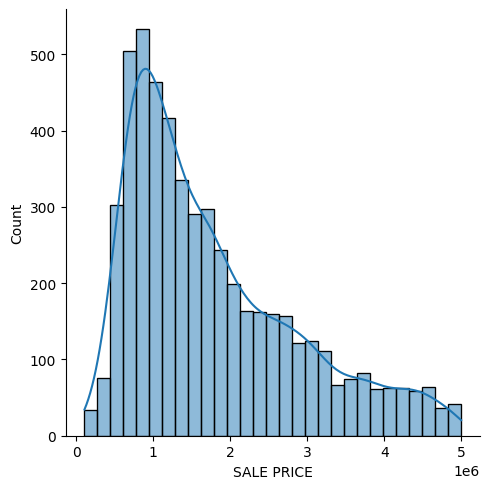

In [42]:
manhattan_dist = df[df['BOROUGH'] == 'Manhattan']['SALE PRICE']

ax = sns.displot(manhattan_dist,
                  kde=True)

Berdasarkan plot di atas, dapat dilihat bahwa distribusi probabilitas untuk Sale Price pada wilayah Manhattan adalah distribusi normal.

<br>

<h3><b> Confidence Intervals

Mengonstruksikan CI untuk rata-rata harga jual di wilayah Manhattan

In [43]:
manhattan_dist.info()

<class 'pandas.core.series.Series'>
Int64Index: 5306 entries, 3 to 18300
Series name: SALE PRICE
Non-Null Count  Dtype  
--------------  -----  
5306 non-null   float64
dtypes: float64(1)
memory usage: 82.9 KB


In [44]:
df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                        mean           std   size
BOROUGH                                          
Bronx           5.705512e+05  5.632315e+05   3619
Brooklyn        1.090322e+06  7.783492e+05  11590
Manhattan       1.775452e+06  1.102737e+06   5306
Queens          7.143978e+05  4.393605e+05  12601
Staten Islands  5.130827e+05  2.666537e+05   5470

Mengambil parameter yang diperlukan hanya untuk wilayah Manhattan dan menghitung standard error serta lower class boundary dan upper boundary class dengan confidence level 95% (z = 1.96)

In [47]:
mean_bronx = 1775452
sd = 1102737
n = 5306
z = 1.96

In [48]:
se = sd / np.sqrt(n)

In [49]:
lcb = mean_bronx - z * se
ucb = mean_bronx + z * se
print("The lower class boundary is", lcb)
print("The upper class boundary is", ucb)

The lower class boundary is 1745780.165690602
The upper class boundary is 1805123.834309398


Hal ini berarti bahwa true mean untuk harga jual pada wilayah Bronx akan berada diantara 1745780.1656 dan 1805123.8343

<br>

<h3><b>Hypothesis Testing

Apakah terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dan tahun 2007 ke atas?

Significance level (alpha) : 5% (0.05)

Hipotesis :

H0 (Null Hypothesis) : μ1 = μ2 (tidak terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dan tahun 2007 ke atas)

H1 (Alternative Hypothesis) : μ1 ≠ μ2 (terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dan tahun 2007 ke atas)

In [50]:
dx = df[['RESIDENTIAL UNITS','YEAR BUILT']]
dx.head()

,RESIDENTIAL UNITS,YEAR BUILT
3,10,1913
6,8,1920
76,1,0
79,1,1920
80,1,1920


In [51]:
dx["YEAR BUILT"] = df["YEAR BUILT"].astype("int")
dx1 = dx[
    (dx['YEAR BUILT'] > 2000) &
    (dx['YEAR BUILT'] < 2007)]
dx1.head()

C:\Users\tsaab\AppData\Local\Temp\ipykernel_10980\482169146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx["YEAR BUILT"] = df["YEAR BUILT"].astype("int")


,RESIDENTIAL UNITS,YEAR BUILT
116,1,2005
122,1,2005
176,1,2003
177,1,2003
178,1,2003


In [53]:
dx2 = dx[(dx['YEAR BUILT'] > 2007)]
dx2.head()

,RESIDENTIAL UNITS,YEAR BUILT
95,1,2014
100,1,2014
104,1,2014
112,1,2014
129,1,2008


In [54]:
# Menentukan mean dan standar deviasi dari Bronx
n1 = len(dx1)
mu1 = dx1['RESIDENTIAL UNITS'].mean()
sd1 = dx1['RESIDENTIAL UNITS'].std()

# Menentukan mean dan standar deviasi dari Staten Islands
n2 = len(dx2)
mu2 = dx2['RESIDENTIAL UNITS'].mean()
sd2 = dx2['RESIDENTIAL UNITS'].std()

 
sm.stats.ztest(dx1['RESIDENTIAL UNITS'], dx2['RESIDENTIAL UNITS'], alternative='two-sided')

(12.581481882616792, 2.6697429591009532e-36)

Karena p-value (2.67e-36) sangat kecil, maka dapat menolak Null Hypothesis bahwa tidak terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dengan properti yang dibangun pada tahun 2007 ke atas.

<br>

<h3><b>Overall Analysis

* Setelah dilakukan data cleaning, terdapat pengurangan jumlah baris dari 84548 baris menjadi 38586 baris dan jumlah kolom dari 22 kolom menjadi 19 kolom. Data yang telah dibersihkan ini dapat digunakan dibandingkan dengan data sebelumnya yang kemungkinan masih terdapat data null, missing value, data duplikat, dan lainnya yang jika tidak dilakukan pembersihan terlebih dahulu akan berpengaruh terhadap tingkat keakuratan data.
* Distribusi probabilitas untuk Sale Price pada wilayah Manhattan adalah distribusi normal.
* Didapatkan Confidence Interval untuk rata-rata Sale Price di wilayah Manhattan berada diantara 1745780.1656 dan 1805123.8343
* Dilakukan pengujian hipotesis untuk menentukan apakah terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dan tahun 2007 ke atas. Dari hasil pengujian hipotesis dengan tingkat signifikansi 5%, didapatkan bahwa terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dengan properti yang dibangun pada tahun 2007 ke atas.